# Modeling
Se configura la experimentación de varios modelos, en este caso para Clasificación, se muestran graficas, metricas comparando el desempeño de cada modelo

In [2]:
# Librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score


# Leer la data

In [3]:
ml_balanc_norm = pd.read_csv('../datasets/curated/ml_dataset.csv')  # data normalizada y balanceada
ml_sin_balanc_norm = pd.read_csv('../datasets/curated/data_limpia_sin_normalizar.csv')  # data sin normalizar ni balancear

In [4]:
# funcion para visualizar los diferentes datasets
def caracteristicas_data(df, nombre):
    print(f'\tVisualización del dataset: {nombre} \n')
    print('-'*50)
    print('Dimensión del dataset: ')
    print(df.shape)
    print('-'*50)
    print('Variable diagnostico: ')
    print(df['diagnostico'].value_counts())
    print('-'*50)
    print('Información de la data: ', df.describe())

In [5]:
caracteristicas_data(df=ml_balanc_norm, nombre="Data_Normalizada_Balanceada")

	Visualización del dataset: Data_Normalizada_Balanceada 

--------------------------------------------------
Dimensión del dataset: 
(713, 24)
--------------------------------------------------
Variable diagnostico: 
diagnostico
1    357
0    356
Name: count, dtype: int64
--------------------------------------------------
Información de la data:         diagnostico  radio_promedio  textura_promedio  perimetro_promedio  \
count   713.000000      713.000000        713.000000          713.000000   
mean      0.500701        0.369975          0.337895            0.365296   
std       0.500351        0.172371          0.139254            0.173808   
min       0.000000        0.033603          0.000000            0.028540   
25%       0.000000        0.239907          0.241123            0.235229   
50%       1.000000        0.332113          0.334461            0.328486   
75%       1.000000        0.498717          0.420697            0.491197   
max       1.000000        1.000000         

In [6]:
caracteristicas_data(df=ml_sin_balanc_norm, nombre="Data_sin_balancear_sin_normalizar")

	Visualización del dataset: Data_sin_balancear_sin_normalizar 

--------------------------------------------------
Dimensión del dataset: 
(569, 24)
--------------------------------------------------
Variable diagnostico: 
diagnostico
0    357
1    212
Name: count, dtype: int64
--------------------------------------------------
Información de la data:         diagnostico  radio_promedio  textura_promedio  perimetro_promedio  \
count   569.000000      569.000000        569.000000          569.000000   
mean      0.372583       14.127292         19.289649           91.969033   
std       0.483918        3.524049          4.301036           24.298981   
min       0.000000        6.981000          9.710000           43.790000   
25%       0.000000       11.700000         16.170000           75.170000   
50%       0.000000       13.370000         18.840000           86.240000   
75%       1.000000       15.780000         21.800000          104.100000   
max       1.000000       28.110000   

# Dividir los dataset en entrenamiento, validación y prueba

In [7]:
from sklearn.model_selection import train_test_split

def preparar_datos(df):
    # Separar la variable objetivo de las variables predictoras
    X = df.drop(columns=['diagnostico'])
    y = df['diagnostico']
    
    # Dividir el dataset en entrenamiento (75%) y prueba (25%)
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)
    
    # Dividir el conjunto de entrenamiento (X_train_full, y_train_full) en entrenamiento (75%) y validación (25%)
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=12345)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [8]:
# X1, y1 son los datos balanceados y normalizados
# X2, y2 son los datos sin balancear y sin normalizar
# todo lo que sea X son las caracteristicas y lo que sea y es el objetivo (target)
X1_entrenamiento, X1_validacion, X1_prueba, y1_entrenamiento, y1_validacion, y1_prueba = preparar_datos(ml_balanc_norm)
X2_entrenamiento, X2_validacion, X2_prueba, y2_entrenamiento, y2_validacion, y2_prueba = preparar_datos(ml_sin_balanc_norm)

In [9]:
X1_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 537 to 83
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   radio_promedio              400 non-null    float64
 1   textura_promedio            400 non-null    float64
 2   perimetro_promedio          400 non-null    float64
 3   area_promedio               400 non-null    float64
 4   suavidad_promedio           400 non-null    float64
 5   compacidad_promedio         400 non-null    float64
 6   concavidad_promedio         400 non-null    float64
 7   puntos_concavos_promedio    400 non-null    float64
 8   simetria_promedio           400 non-null    float64
 9   dimension_fractal_promedio  400 non-null    float64
 10  radio_se                    400 non-null    float64
 11  textura_se                  400 non-null    float64
 12  perimetro_se                400 non-null    float64
 13  radio_peor                  400 non-nul

# Entrenar y evaluar modelos predictivos

In [10]:
historico_metricas = pd.DataFrame()

Se genera esta variable global para hacer un historico de todos los modelos probados y seleccionar el de mejor desempeño una vez culminado el proyecto 

# Regresion logistica

In [11]:


def regresionLogistica(X_train, y_train, X_test, y_test, parametros, nombre_dataset, nombre_modelo):
    global historico_metricas  # Accedemos al DataFrame global
    
    # Crear el modelo de regresión logística con los parámetros proporcionados
    reg_log = LogisticRegression(random_state=12345, **parametros)
    # Ajustar el modelo a los datos de entrenamiento
    reg_log.fit(X_train, y_train)
    
    # Predicciones en entrenamiento y prueba
    y_pred_train = reg_log.predict(X_train)
    y_pred_test = reg_log.predict(X_test)
    
    # Calcular métricas
    metricas = {
        'Modelo': nombre_modelo,
        'Dataset': nombre_dataset,
        'C': parametros.get('C', 'default'),
        'Solver': parametros.get('solver', 'default'),
        'Accuracy_train': accuracy_score(y_train, y_pred_train),
        'Accuracy_test': accuracy_score(y_test, y_pred_test),
        'Recall_train': recall_score(y_train, y_pred_train),
        'Recall_test': recall_score(y_test, y_pred_test),
        'Precision_train': precision_score(y_train, y_pred_train),
        'Precision_test': precision_score(y_test, y_pred_test),
        'F1_train': f1_score(y_train, y_pred_train),
        'F1_test': f1_score(y_test, y_pred_test),
        'coeficiente': reg_log.coef_
    }
    
    print('\nMÉTRICAS DE EVALUACIÓN DEL MODELO:')
    for key, value in metricas.items():
        if isinstance(value, (int, float)):  # Si el valor es numérico
            print(f'{key}: {value:.3f}')
        else:  # Si no es numérico (como 'default')
            print(f'{key}: {value}')
    
    

    # Validación cruzada con 5 particiones
    scores = cross_val_score(reg_log, X_train, y_train, cv=5, scoring='accuracy')

    # Resultados
    print("Accuracy promedio:", scores.mean())
    print("Desviación estándar:", scores.std())
        
    # Agregar las métricas al DataFrame global
    historico_metricas = pd.concat([historico_metricas, pd.DataFrame([metricas])], ignore_index=True)
    
    return metricas

*** solver: Literal['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] = "lbfgs"

In [12]:
parametros = {}  
# 'C': 1.0, # Regularización inversa
# 'solver': 'lbfgs', # Algoritmo de optimización por defecto

metricas_data_1 = regresionLogistica(X1_entrenamiento, y1_entrenamiento, X1_prueba, y1_prueba, parametros, "data_normalizada_balanceada","Regresion_Logistica_default")
metricas_data_2 = regresionLogistica(X2_entrenamiento, y2_entrenamiento, X2_prueba, y2_prueba, parametros, "data_sin_normalizar_balancear","Regresion_Logistica")


MÉTRICAS DE EVALUACIÓN DEL MODELO:
Modelo: Regresion_Logistica_default
Dataset: data_normalizada_balanceada
C: default
Solver: default
Accuracy_train: 0.953
Accuracy_test: 0.966
Recall_train: 0.937
Recall_test: 0.976
Precision_train: 0.970
Precision_test: 0.954
F1_train: 0.953
F1_test: 0.965
coeficiente: [[ 1.46342997  1.28523762  1.43736537  1.2220189   0.5199191   0.34927869
   1.17722008  1.71073616 -0.02234555 -0.9498045   0.66537666 -0.63371077
   0.69268324  1.76261738  2.48753055  1.53381462  1.25012633  1.76341791
   0.89050544  1.45234097  2.4081551   1.30897599  0.17101666]]
Accuracy promedio: 0.945
Desviación estándar: 0.020310096011589895


c:\Users\Aurora\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Aurora\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/


MÉTRICAS DE EVALUACIÓN DEL MODELO:
Modelo: Regresion_Logistica
Dataset: data_sin_normalizar_balancear
C: default
Solver: default
Accuracy_train: 0.947
Accuracy_test: 0.958
Recall_train: 0.927
Recall_test: 0.902
Precision_train: 0.934
Precision_test: 0.979
F1_train: 0.931
F1_test: 0.939
coeficiente: [[-1.33933302e+00 -2.54839805e-01  2.52827471e-02  1.78177362e-04
   5.81896315e-02  2.32428527e-01  3.17583816e-01  1.43052424e-01
   9.43227897e-02  1.30925510e-02  1.38586262e-01 -9.25321372e-02
   9.32890825e-01 -1.50610762e+00  3.49408395e-01  9.28258716e-02
   2.95295544e-02  7.84452204e-02  5.70643261e-01  7.31519548e-01
   2.47655893e-01  2.10023395e-01  4.94888408e-02]]
Accuracy promedio: 0.9277281746031747
Desviación estándar: 0.02970919605096982


c:\Users\Aurora\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Aurora\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [13]:
parametros = {'C': 1.0, 'solver': 'liblinear'}  
# 'C': 1.0, # Regularización inversa
# 'solver': 'lbfgs', # Algoritmo de optimización por defecto

metricas_data_1 = regresionLogistica(X1_entrenamiento, y1_entrenamiento, X1_prueba, y1_prueba, parametros, "data_normalizada_balanceada","Regresion_Logistica")
metricas_data_2 = regresionLogistica(X2_entrenamiento, y2_entrenamiento, X2_prueba, y2_prueba, parametros, "data_sin_normalizar_balancear","Regresion_Logistica")


MÉTRICAS DE EVALUACIÓN DEL MODELO:
Modelo: Regresion_Logistica
Dataset: data_normalizada_balanceada
C: 1.000
Solver: liblinear
Accuracy_train: 0.958
Accuracy_test: 0.933
Recall_train: 0.956
Recall_test: 0.929
Precision_train: 0.961
Precision_test: 0.929
F1_train: 0.959
F1_test: 0.929
coeficiente: [[ 0.53867058  0.73404631  0.60276397  0.81353964 -0.33520096  0.36936691
   1.68810959  2.05251115 -0.69591782 -1.48413561  0.63945081 -1.14803253
   0.50809085  1.16965766  2.09729275  1.02092769  1.07934724  1.03047693
   0.80990631  1.45627736  2.08195668  0.79022347 -0.01247395]]
Accuracy promedio: 0.945
Desviación estándar: 0.023184046238739254

MÉTRICAS DE EVALUACIÓN DEL MODELO:
Modelo: Regresion_Logistica
Dataset: data_sin_normalizar_balancear
C: 1.000
Solver: liblinear
Accuracy_train: 0.950
Accuracy_test: 0.965
Recall_train: 0.911
Recall_test: 0.922
Precision_train: 0.957
Precision_test: 0.979
F1_train: 0.933
F1_test: 0.949
coeficiente: [[-1.79588185 -0.03976503  0.20248733 -0.011162

Data Normalizada y Balanceada:
Accuracy en prueba (0.966) y recall (0.976) son muy altos y consistentes con los valores de entrenamiento que da a entender que el modelo generaliza bien en este dataset, y los ajustes han sido adecuados.
La precisión ligeramente menor en prueba (0.954) indica que podrías estar sacrificando un poco la especificidad en favor de sensibilidad, que es lo que se busca en este este dataset de cancer.

en la data sin normalizar el Recall en prueba (0.901) es significativamente más bajo comparado con el accuracy (0.958) y precisión (0.979). Esto podría indicar que el modelo está pasando por alto algunos positivos reales en este dataset.

# Arbol de decision

In [14]:
def arbolDecision(X_train, y_train, X_test, y_test, parametros_arbol, nombre_dataset, nombre_modelo):
    global historico_metricas  # Acceso al DataFrame global
    
    # Crear el modelo de árbol de decisión con los parámetros proporcionados
    arbol_clf = DecisionTreeClassifier(random_state=12345, **parametros_arbol)
    
    # Ajustar el modelo a los datos de entrenamiento
    arbol_clf.fit(X_train, y_train)
    
    # Predicciones en entrenamiento y prueba
    y_pred_train = arbol_clf.predict(X_train)
    y_pred_test = arbol_clf.predict(X_test)
    
    # Calcular métricas
    metricas = {
        'Modelo': nombre_modelo,
        'Dataset': nombre_dataset,
        'Max_Depth': parametros_arbol.get('max_depth', 'default'),
        'Min_Samples_Split': parametros_arbol.get('min_samples_split', 'default'),
        'Accuracy_train': accuracy_score(y_train, y_pred_train),
        'Accuracy_test': accuracy_score(y_test, y_pred_test),
        'Recall_train': recall_score(y_train, y_pred_train),
        'Recall_test': recall_score(y_test, y_pred_test),
        'Precision_train': precision_score(y_train, y_pred_train),
        'Precision_test': precision_score(y_test, y_pred_test),
        'F1_train': f1_score(y_train, y_pred_train),
        'F1_test': f1_score(y_test, y_pred_test)
    }
    
    print('\nMÉTRICAS DE EVALUACIÓN DEL MODELO:')
    for key, value in metricas.items():
        if isinstance(value, (int, float)):  # Si el valor es numérico
            print(f'{key}: {value:.3f}')
        else:  # Si no es numérico (como 'default')
            print(f'{key}: {value}')
    
    # Validación cruzada con 5 particiones
    scores = cross_val_score(arbol_clf, X_train, y_train, cv=5, scoring='accuracy')

    # Resultados
    print("Accuracy promedio:", scores.mean())
    print("Desviación estándar:", scores.std())
    
    # Agregar las métricas al DataFrame global
    historico_metricas = pd.concat([historico_metricas, pd.DataFrame([metricas])], ignore_index=True)
    
    return metricas

class DecisionTreeClassifier(
    *,
    criterion: Literal['gini', 'entropy', 'log_loss'] = "gini",
    splitter: Literal['best', 'random'] = "best",
    max_depth: Int | None = None,
    min_samples_split: float = 2,
    min_samples_leaf: float = 1,
    min_weight_fraction_leaf: Float = 0,
    max_features: float | Literal['auto', 'sqrt', 'log2'] | None = None,
    random_state: Int | RandomState | None = None,
    max_leaf_nodes: Int | None = None,
    min_impurity_decrease: Float = 0,
    class_weight: Mapping | str | Sequence[Mapping] | None = None,
    ccp_alpha: float = 0
)

In [15]:
# Parámetros para el árbol de decisión
parametros_arbol = {}  # Parámetros por defecto
# Modelo para dataset normalizado
metricas_normalizado = arbolDecision(X1_entrenamiento, y1_entrenamiento, X1_prueba, y1_prueba, parametros_arbol, "data_normalizada_balanceada", "Arbol_decision_default")

# Modelo para dataset sin normalizar
metricas_sin_normalizar = arbolDecision(X2_entrenamiento, y2_entrenamiento, X2_prueba, y2_prueba, parametros_arbol, "data_sin_normalizar_balancear", "Arbol_decision_default")


MÉTRICAS DE EVALUACIÓN DEL MODELO:
Modelo: Arbol_decision_default
Dataset: data_normalizada_balanceada
Max_Depth: default
Min_Samples_Split: default
Accuracy_train: 1.000
Accuracy_test: 0.950
Recall_train: 1.000
Recall_test: 0.988
Precision_train: 1.000
Precision_test: 0.913
F1_train: 1.000
F1_test: 0.949
Accuracy promedio: 0.9349999999999999
Desviación estándar: 0.014577379737113242

MÉTRICAS DE EVALUACIÓN DEL MODELO:
Modelo: Arbol_decision_default
Dataset: data_sin_normalizar_balancear
Max_Depth: default
Min_Samples_Split: default
Accuracy_train: 1.000
Accuracy_test: 0.902
Recall_train: 1.000
Recall_test: 0.882
Precision_train: 1.000
Precision_test: 0.849
F1_train: 1.000
F1_test: 0.865
Accuracy promedio: 0.9089781746031746
Desviación estándar: 0.02555213548050355


In [16]:
# Parámetros para el árbol de decisión
parametros_arbol = {
    'max_depth': 3, 
    'min_samples_split': 2,
    'min_samples_leaf': 2
}

# 'max_depth': [3, 5, 10, None],
# 'min_samples_split': [2, 5, 10],
# 'min_samples_leaf': [1, 2, 4],


# Modelo para dataset normalizado
metricas_normalizado = arbolDecision(X1_entrenamiento, y1_entrenamiento, X1_prueba, y1_prueba, parametros_arbol, "data_normalizada_balanceada", "Arbol_decision")

# Modelo para dataset sin normalizar
metricas_sin_normalizar = arbolDecision(X2_entrenamiento, y2_entrenamiento, X2_prueba, y2_prueba, parametros_arbol, "data_sin_normalizar_balancear", "Arbol_decision")


MÉTRICAS DE EVALUACIÓN DEL MODELO:
Modelo: Arbol_decision
Dataset: data_normalizada_balanceada
Max_Depth: 3.000
Min_Samples_Split: 2.000
Accuracy_train: 0.970
Accuracy_test: 0.944
Recall_train: 0.947
Recall_test: 0.941
Precision_train: 0.995
Precision_test: 0.941
F1_train: 0.970
F1_test: 0.941
Accuracy promedio: 0.9275
Desviación estándar: 0.02893959225697557

MÉTRICAS DE EVALUACIÓN DEL MODELO:
Modelo: Arbol_decision
Dataset: data_sin_normalizar_balancear
Max_Depth: 3.000
Min_Samples_Split: 2.000
Accuracy_train: 0.981
Accuracy_test: 0.895
Recall_train: 1.000
Recall_test: 0.902
Precision_train: 0.953
Precision_test: 0.821
F1_train: 0.976
F1_test: 0.860
Accuracy promedio: 0.9183531746031747
Desviación estándar: 0.02372121105265253


En el modelo de Árbol de Decisión, las pruebas con el dataset balanceado muestran métricas de accuracy de 0.99 y recall de 0.95, lo que podría ser indicativo de sobreentrenamiento. Por otro lado, en el dataset sin balancear ni normalizar, las métricas en prueba son de accuracy de 0.902 y recall de 0.88, pero las métricas de entrenamiento alcanzan valores perfectos de 1.0. Esto revela una discrepancia significativa entre el rendimiento en entrenamiento y prueba, lo que refuerza la hipótesis de sobreentrenamiento. En contraste, el modelo ajustado del Árbol de Decisión logra un mejor equilibrio entre entrenamiento y prueba. En el dataset normalizado, el accuracy en prueba mejora a 0.944, mientras que el recall mantiene un nivel satisfactorio de 0.941.

# Random Forest Classifier

In [17]:
def randomForestClassifier(X_train, y_train, X_test, y_test, parametros_bosque, nombre_dataset, nombre_modelo):
    global historico_metricas  # Acceso al DataFrame global
    
    # Crear el modelo de Random Forest con los parámetros proporcionados
    bosque_clf = RandomForestClassifier(random_state=12345, **parametros_bosque)
    
    # Ajustar el modelo a los datos de entrenamiento
    bosque_clf.fit(X_train, y_train)
    
    # Predicciones en entrenamiento y prueba
    y_pred_train = bosque_clf.predict(X_train)
    y_pred_test = bosque_clf.predict(X_test)
    
    # Calcular métricas
    metricas = {
        'Modelo': nombre_modelo,
        'Dataset': nombre_dataset,
        'n_estimators': parametros_bosque.get('n_estimators', 'default'),
        'max_depth': parametros_bosque.get('max_depth', 'default'),
        'max_features': parametros_bosque.get('max_features', 'default'),
        'bootstrap': parametros_bosque.get('bootstrap', 'default'),
        'Accuracy_train': accuracy_score(y_train, y_pred_train),
        'Accuracy_test': accuracy_score(y_test, y_pred_test),
        'Recall_train': recall_score(y_train, y_pred_train),
        'Recall_test': recall_score(y_test, y_pred_test),
        'Precision_train': precision_score(y_train, y_pred_train),
        'Precision_test': precision_score(y_test, y_pred_test),
        'F1_train': f1_score(y_train, y_pred_train),
        'F1_test': f1_score(y_test, y_pred_test)
    }
    
    print('\nMÉTRICAS DE EVALUACIÓN DEL MODELO:')
    for key, value in metricas.items():
        if isinstance(value, (int, float)):  # Si el valor es numérico
            print(f'{key}: {value:.3f}')
        else:  # Si no es numérico (como 'default')
            print(f'{key}: {value}')
    
    # Validación cruzada con 5 particiones
    scores = cross_val_score(bosque_clf, X_train, y_train, cv=5, scoring='accuracy')

    # Resultados
    print("Accuracy promedio:", scores.mean())
    print("Desviación estándar:", scores.std())
    
    # Agregar las métricas al DataFrame global
    historico_metricas = pd.concat([historico_metricas, pd.DataFrame([metricas])], ignore_index=True)
    
    return metricas

In [18]:
parametros_bosque = {}  # Sin parámetros personalizados (valores por defecto)
metricas_por_defecto_1 = randomForestClassifier(X1_entrenamiento, y1_entrenamiento, X1_prueba, y1_prueba, parametros_bosque, "data_normalizada_balanceada", "Random_Forest_default")

metricas_por_defecto_2 = randomForestClassifier(X2_entrenamiento, y2_entrenamiento, X2_prueba, y2_prueba, parametros_bosque, "data_sin_normalizar_balancear", "Random_Forest_default")


MÉTRICAS DE EVALUACIÓN DEL MODELO:
Modelo: Random_Forest_default
Dataset: data_normalizada_balanceada
n_estimators: default
max_depth: default
max_features: default
bootstrap: default
Accuracy_train: 1.000
Accuracy_test: 0.966
Recall_train: 1.000
Recall_test: 0.965
Precision_train: 1.000
Precision_test: 0.965
F1_train: 1.000
F1_test: 0.965
Accuracy promedio: 0.9724999999999999
Desviación estándar: 0.012247448713915915

MÉTRICAS DE EVALUACIÓN DEL MODELO:
Modelo: Random_Forest_default
Dataset: data_sin_normalizar_balancear
n_estimators: default
max_depth: default
max_features: default
bootstrap: default
Accuracy_train: 1.000
Accuracy_test: 0.958
Recall_train: 1.000
Recall_test: 0.941
Precision_train: 1.000
Precision_test: 0.941
F1_train: 1.000
F1_test: 0.941
Accuracy promedio: 0.9497519841269841
Desviación estándar: 0.027145039884852167


In [19]:
# Definir parámetros para el modelo Random Forest
parametros_bosque = {
    'n_estimators': 100,       # Número de árboles en el bosque
    'max_depth': None,           # Profundidad máxima de los árboles
    'max_features': 'sqrt',    # Máximo número de características en cada división
    'bootstrap': True          # Usar bootstrap para crear subconjuntos de entrenamiento
}

# 'n_estimators': [100, 200],
# 'max_depth': [None, 10, 20],
# 'min_samples_split': [2, 5],
# 'min_samples_leaf': [1, 2],
# 'max_features': ['sqrt', 'log2'],
# 'bootstrap': [True, False],
# 'criterion': ['gini', 'entropy']

# Ejecutar modelo con dataset normalizado
metricas_normalizado = randomForestClassifier(X1_entrenamiento, y1_entrenamiento, X1_prueba, y1_prueba, parametros_bosque, "data_normalizada_balanceada", "Random_Forest")

# Ejecutar modelo con dataset sin normalizar
metricas_sin_normalizar = randomForestClassifier(X2_entrenamiento, y2_entrenamiento, X2_prueba, y2_prueba, parametros_bosque, "data_sin_normalizar_balancear", "Random_Forest")


MÉTRICAS DE EVALUACIÓN DEL MODELO:
Modelo: Random_Forest
Dataset: data_normalizada_balanceada
n_estimators: 100.000
max_depth: None
max_features: sqrt
bootstrap: 1.000
Accuracy_train: 1.000
Accuracy_test: 0.966
Recall_train: 1.000
Recall_test: 0.965
Precision_train: 1.000
Precision_test: 0.965
F1_train: 1.000
F1_test: 0.965
Accuracy promedio: 0.9724999999999999
Desviación estándar: 0.012247448713915915

MÉTRICAS DE EVALUACIÓN DEL MODELO:
Modelo: Random_Forest
Dataset: data_sin_normalizar_balancear
n_estimators: 100.000
max_depth: None
max_features: sqrt
bootstrap: 1.000
Accuracy_train: 1.000
Accuracy_test: 0.958
Recall_train: 1.000
Recall_test: 0.941
Precision_train: 1.000
Precision_test: 0.941
F1_train: 1.000
F1_test: 0.941
Accuracy promedio: 0.9497519841269841
Desviación estándar: 0.027145039884852167


En el caso de Random Forest, el desempeño en prueba y entrenamiento es consistente. Tanto el accuracy como el recall alcanzan valores de 0.96, lo que indica que el modelo no está sobreajustado. Asimismo, en el dataset sin normalizar ni balancear, aunque las métricas disminuyen ligeramente, el modelo sigue mostrando un desempeño consistente. Cabe destacar que en el modelo ajustado de Random Forest no se observan cambios significativos en el desempeño, lo que sugiere que las configuraciones predeterminadas ya eran óptimas

# Graficas

In [20]:
metricas_sin_normalizar = historico_metricas[historico_metricas['Dataset'] == 'data_sin_normalizar_balancear']
metricas_normalizado = historico_metricas[historico_metricas['Dataset'] == 'data_normalizada_balanceada']

In [21]:
metricas_sin_normalizar

,Modelo,Dataset,C,Solver,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test,coeficiente,Max_Depth,Min_Samples_Split,n_estimators,max_depth,max_features,bootstrap
1,Regresion_Logistica,data_sin_normalizar_balancear,default,default,0.946708,0.958042,0.926829,0.901961,0.934426,0.978723,0.930612,0.938776,"[[-1.3393330233001672, -0.25483980528189343, 0...",NaN,NaN,NaN,NaN,NaN,NaN
3,Regresion_Logistica,data_sin_normalizar_balancear,1.0,liblinear,0.949843,0.965035,0.910569,0.921569,0.957265,0.979167,0.933333,0.949495,"[[-1.7958818501359277, -0.03976502672298144, 0...",NaN,NaN,NaN,NaN,NaN,NaN
5,Arbol_decision_default,data_sin_normalizar_balancear,NaN,NaN,1.000000,0.902098,1.000000,0.882353,1.000000,0.849057,1.000000,0.865385,NaN,default,default,NaN,NaN,NaN,NaN
7,Arbol_decision,data_sin_normalizar_balancear,NaN,NaN,0.981191,0.895105,1.000000,0.901961,0.953488,0.821429,0.976190,0.859813,NaN,3,2,NaN,NaN,NaN,NaN
9,Random_Forest_default,data_sin_normalizar_balancear,NaN,NaN,1.000000,0.958042,1.000000,0.941176,1.000000,0.941176,1.000000,0.941176,NaN,NaN,NaN,default,default,default,default
11,Random_Forest,data_sin_normalizar_balancear,NaN,NaN,1.000000,0.958042,1.000000,0.941176,1.000000,0.941176,1.000000,0.941176,NaN,NaN,NaN,100,None,sqrt,True


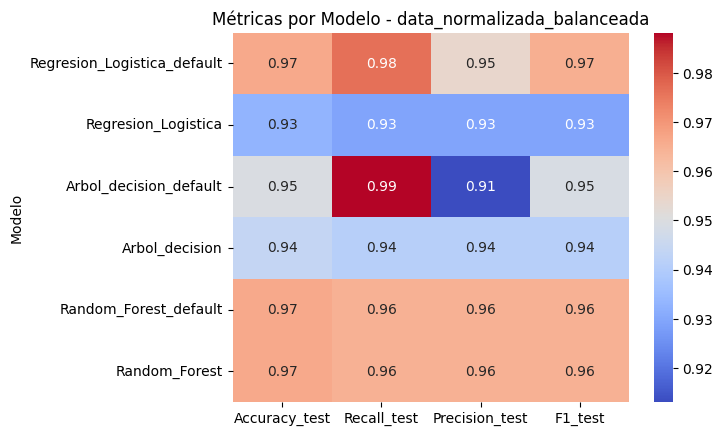

In [22]:
# Seleccionar las métricas relevantes
datos = metricas_normalizado[['Modelo', 'Accuracy_test', 'Recall_test', 'Precision_test', 'F1_test']].set_index('Modelo')

# Crear heatmap
sns.heatmap(datos, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Métricas por Modelo - data_normalizada_balanceada')
plt.show()

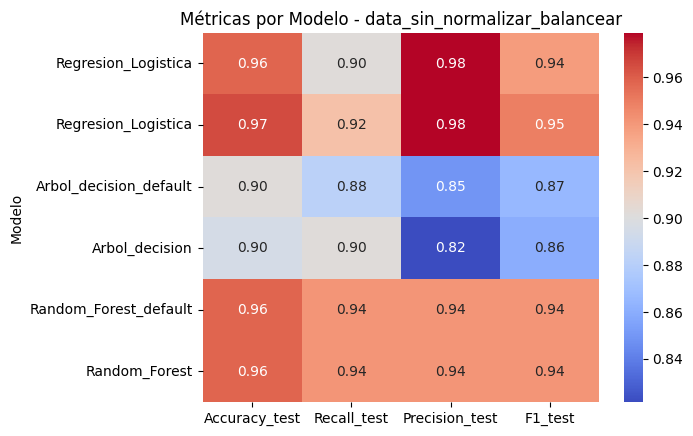

In [23]:
# Seleccionar las métricas relevantes
datos = metricas_sin_normalizar[['Modelo', 'Accuracy_test', 'Recall_test', 'Precision_test', 'F1_test']].set_index('Modelo')

# Crear heatmap
sns.heatmap(datos, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Métricas por Modelo - data_sin_normalizar_balancear')
plt.show()

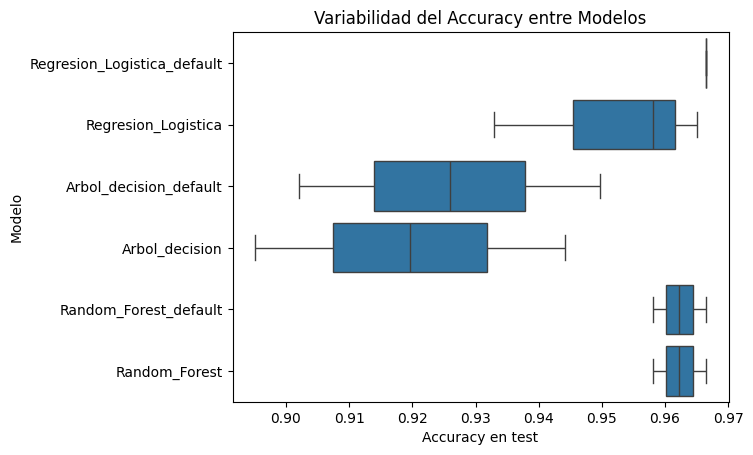

In [24]:
# Supongamos que tienes varias pruebas del mismo modelo en el DataFrame
sns.boxplot(x='Accuracy_test', y='Modelo', data=historico_metricas)
plt.title('Variabilidad del Accuracy entre Modelos')
plt.xlabel('Accuracy en test')
plt.ylabel('Modelo')
plt.show()

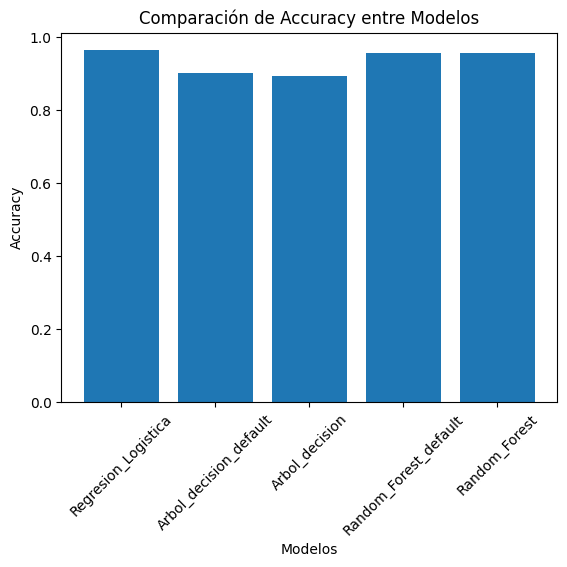

In [25]:
import matplotlib.pyplot as plt

# Filtrar los datos del DataFrame
modelos = metricas_sin_normalizar['Modelo']
accuracy = metricas_sin_normalizar['Accuracy_test']

# Gráfico de barras
plt.bar(modelos, accuracy)
plt.title('Comparación de Accuracy entre Modelos')
plt.ylabel('Accuracy')
plt.xlabel('Modelos')
plt.xticks(rotation=45)  # Rotar los nombres de los modelos si son largos
plt.show()

In [26]:
metricas_normalizado.columns

Index(['Modelo', 'Dataset', 'C', 'Solver', 'Accuracy_train', 'Accuracy_test',
       'Recall_train', 'Recall_test', 'Precision_train', 'Precision_test',
       'F1_train', 'F1_test', 'coeficiente', 'Max_Depth', 'Min_Samples_Split',
       'n_estimators', 'max_depth', 'max_features', 'bootstrap'],
      dtype='object')

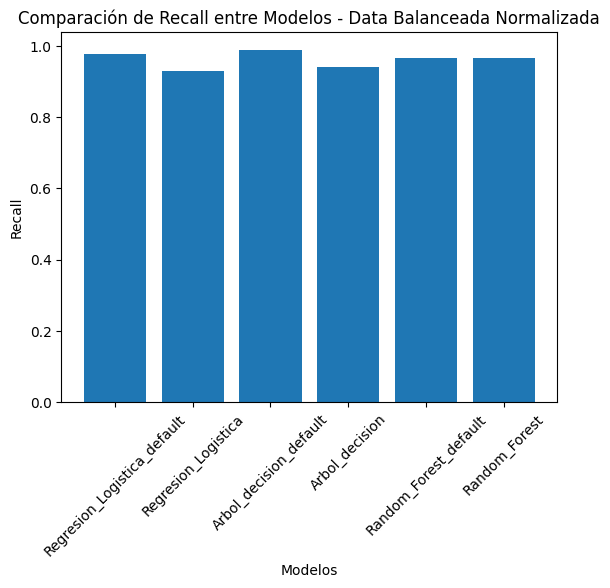

In [27]:
# Filtrar los datos del DataFrame
modelos = metricas_normalizado['Modelo']
accuracy = metricas_normalizado['Recall_test']

# Gráfico de barras
plt.bar(modelos, accuracy)
plt.title('Comparación de Recall entre Modelos - Data Balanceada Normalizada')
plt.ylabel('Recall')
plt.xlabel('Modelos')
plt.xticks(rotation=45)  # Rotar los nombres de los modelos si son largos
plt.show()

Conclusiones 
El modelo Random Forest en data normalizada y balanceada. Este modelo logra precisión y recall consistentes tanto en entrenamiento como prueba, indicando una excelente capacidad de generalización.
El data set normalizado y balanceado tienden a proporcionar métricas más estables y equilibradas, especialmente en Regresión Logística y Árbol de Decisión.
Los árboles de decisión predeterminados muestran un ajuste excesivo en los datos de entrenamiento en la data set normalizado balanceado. Los ajustes como max_depth  y min_samples_split  son efectivos para mejorar la generalización.


# Guardar modelos probados

In [29]:
# Guardar las métricas en un archivo CSV
historico_metricas.to_csv('../reports/metricas_modelos.csv', index=False)